# Tutorial 2: 10x Visium mouse brain dataset

We performed recovery and generation experiments on the Adult Mouse Brain Section 1 (Coronal). In this tutorial, we only focus on generation experiment. On the tissue section, we generated unmeasured spots in the gaps of the measured spots, which are three times the number of the measured spots. We got high-density generated gene expression profiles by STAGE.

The 10x Visium data can be downloaded from [10x genomic website](https://www.10xgenomics.com/resources/datasets/adult-mouse-brain-section-1-coronal-stains-dapi-anti-neu-n-1-standard-1-1-0).

# Data preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")
import STAGE
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
input_dir = 'Data'
adata = sc.read_visium(path=input_dir, count_file='filtered_feature_bc_matrix.h5')
adata.var_names_make_unique()

In [3]:
adata.obsm["coord"]=adata.obs.loc[:, ['array_col', 'array_row']].to_numpy()

In [4]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Running STAGE

In [5]:
adata_stage=STAGE.STAGE(
    adata, 
    save_path='./T2_mouse_brain', 
    data_type='10x', 
    experiment='generation', 
    coord_sf=77, 
    train_epoch=2000, 
    batch_size=512, 
    learning_rate=1e-3, 
    w_recon=0.1, 
    w_w=0.1, 
    w_l1=0.1
)

Epochs: 100%|██████| 2000/2000 [24:52<00:00,  1.24it/s, latent_loss: 0.00603, recon_loss: 0.05731, total_loss: 0.01176]


In [6]:
adata_stage

AnnData object with n_obs × n_vars = 10808 × 3000
    obsm: 'coord'

# Genes spatial visualizaion

In [7]:
# Flip the y-coordinates
adata.obsm['coord'][:,1] = adata.obsm['coord'][:,1]*(-1)
adata_stage.obsm['coord'][:,1] = adata_stage.obsm['coord'][:,1]*(-1)

In [8]:
show_gene=["Hpca", "Camk2n1", "Mast3", "Gse1", "Sipa1l3", "Sorl1", "Hmgn2"]

[<AxesSubplot:title={'center':'Hpca'}, xlabel='coord1', ylabel='coord2'>,
 <AxesSubplot:title={'center':'Camk2n1'}, xlabel='coord1', ylabel='coord2'>,
 <AxesSubplot:title={'center':'Mast3'}, xlabel='coord1', ylabel='coord2'>,
 <AxesSubplot:title={'center':'Gse1'}, xlabel='coord1', ylabel='coord2'>,
 <AxesSubplot:title={'center':'Sipa1l3'}, xlabel='coord1', ylabel='coord2'>,
 <AxesSubplot:title={'center':'Sorl1'}, xlabel='coord1', ylabel='coord2'>,
 <AxesSubplot:title={'center':'Hmgn2'}, xlabel='coord1', ylabel='coord2'>]

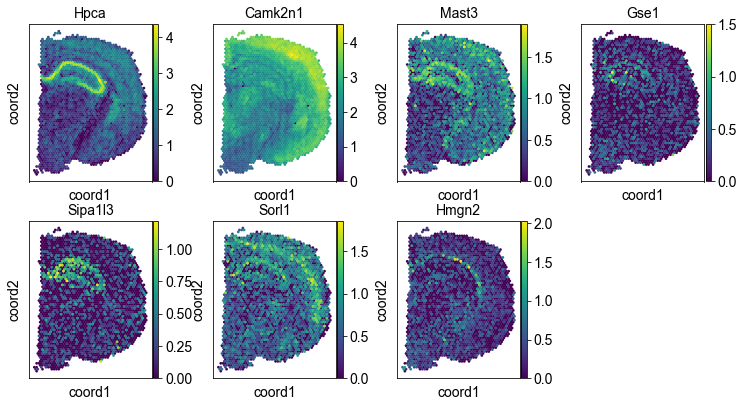

In [9]:
sc.set_figure_params(dpi=80, figsize=(2.2, 3))
sc.pl.embedding(adata, basis="coord", color=show_gene, s=30, show=False)

[<AxesSubplot:title={'center':'Hpca'}, xlabel='coord1', ylabel='coord2'>,
 <AxesSubplot:title={'center':'Camk2n1'}, xlabel='coord1', ylabel='coord2'>,
 <AxesSubplot:title={'center':'Mast3'}, xlabel='coord1', ylabel='coord2'>,
 <AxesSubplot:title={'center':'Gse1'}, xlabel='coord1', ylabel='coord2'>,
 <AxesSubplot:title={'center':'Sipa1l3'}, xlabel='coord1', ylabel='coord2'>,
 <AxesSubplot:title={'center':'Sorl1'}, xlabel='coord1', ylabel='coord2'>,
 <AxesSubplot:title={'center':'Hmgn2'}, xlabel='coord1', ylabel='coord2'>]

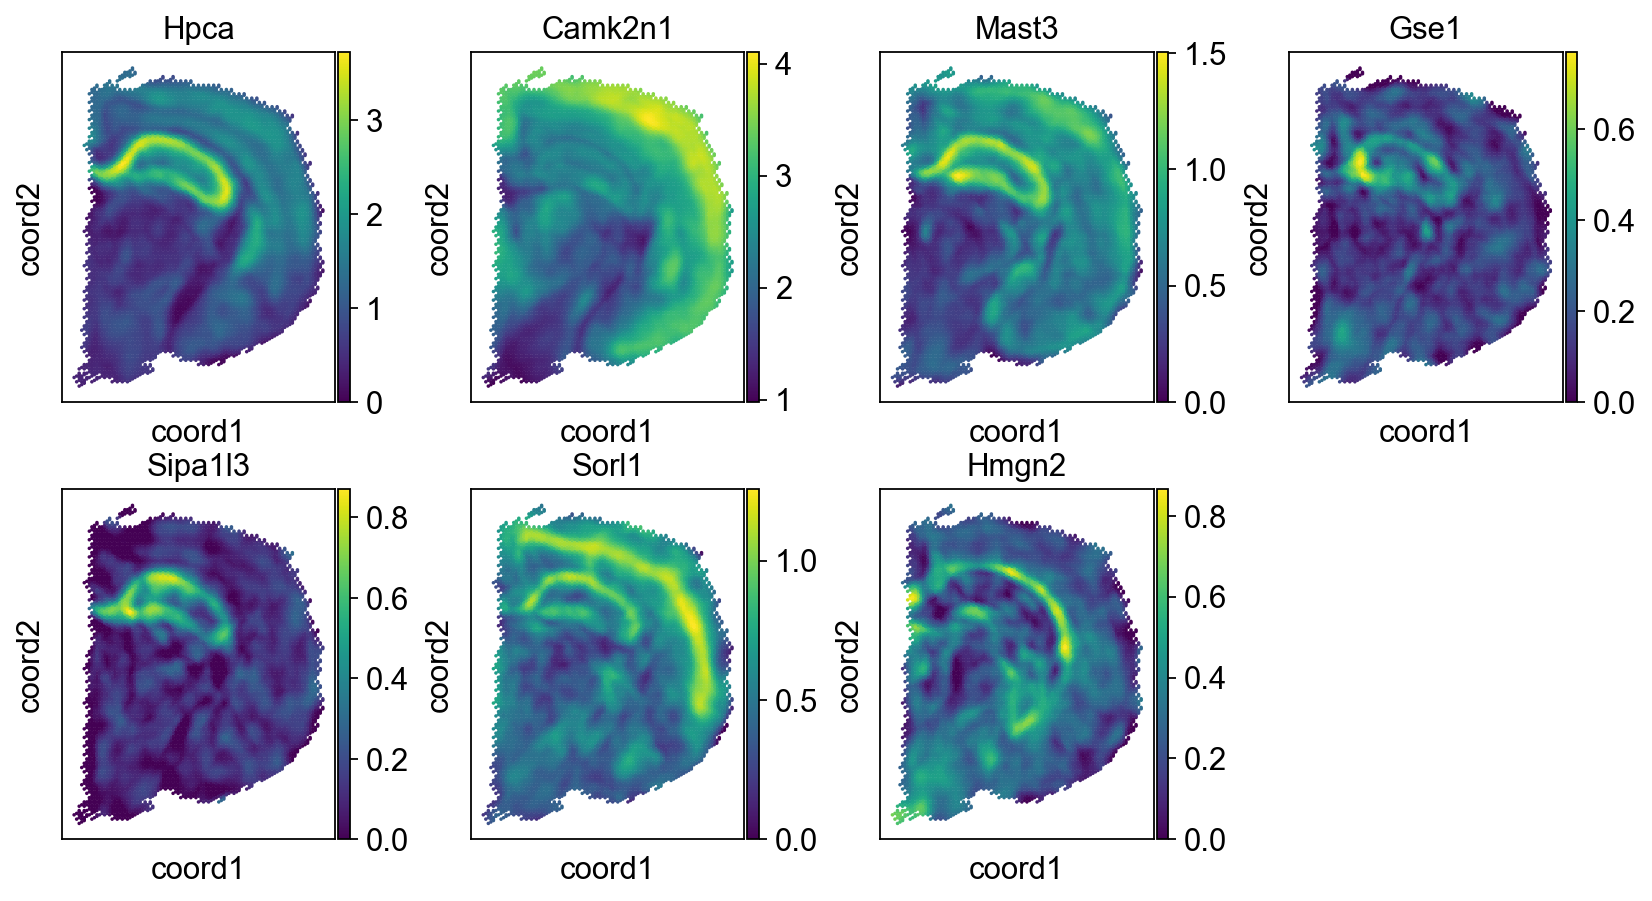

In [10]:
sc.set_figure_params(dpi=80, figsize=(2.2, 3))
sc.pl.embedding(adata_stage, basis="coord", color=show_gene, s=10, show=False)